# Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
estimator = logreg
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 50)

# Loading the data and checking basic values

In [ ]:
#importing the librapd
df = pd.read_csv("Leads.csv")
df.head(5)

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

Checking data set # shape # type # numeric values

In [ ]:
# to check shape of the dataset
df.shape

(9240, 37)

(9240, 37)

In [ ]:
# to check diffrent columns in the dataset 
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
# describing the data

df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [ ]:
# To check the info to see the types of the feature variables and the null values present

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data processing

Checking null values 

In [ ]:
round(df.isna().sum().sort_values(ascending=False), 2) # in numbers

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [ ]:
# checking % of missing values 

round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

droping values where missing data is more then 30%

In [ ]:
df.drop(["Lead Quality", "Asymmetrique Activity Index" , "Asymmetrique Profile Score", "Asymmetrique Activity Score", "Asymmetrique Profile Index","Tags"], axis=1 , inplace=True)
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

     City I agree to pay the amount through cheque  \
0  Select                                       No   
1  Select                                       No   
2  Mumbai                                       No   
3  Mumbai  

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

     City I agree to pay the amount through cheque  \
0  Select                                       No   
1  Select                                       No   
2  Mumbai                                       No   
3  Mumbai  

Checking the values 

In [ ]:
#Checking Sum

round(df.isna().sum().sort_values(ascending=False),2)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [ ]:
#Checking %
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Newspaper                                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Ad

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Newspaper                                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Ad

There are certain values which we do not need/required example "CITY" , COUNTRY" ,"Prospect_ID"

In [ ]:
df.drop(["City", "Country",'Prospect ID'], axis=1 , inplace=True)
df.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website                   Select   
1                   2.5             Email Opened                   Select   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website                   Select   
1                   2.5             Email Opened                   Select   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    

In [ ]:
#Checking the column again

df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
# Checking the values again

round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Number                                       0.00
Newspaper                                         0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Advertisement                             0.00
Search    

Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Number                                       0.00
Newspaper                                         0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Advertisement                             0.00
Search    

There are certain values wherein students have not selected any values and we can ignore such values

In [ ]:
for c in df.columns:
    print(df[c].astype('category').value_counts())

579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: i

We have identified two columns where we have high 'Select' values "Lead Profile` and `How did you hear about X Education'. We can't use these values to while doing analysis so it's better to drop them.

In [ ]:
df.drop(["Lead Profile", "How did you hear about X Education"], axis=1 , inplace=True)
df.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website                   Select   
1                   2.5             Email Opened                   Select   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                   Select   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content  \
0                                No                        No   
1                                No                        No   
2                                No                        No   
3                                No                        No   
4                                No                        No   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website                   Select   
1                   2.5             Email Opened                   Select   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                   Select   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content  \
0                                No                        No   
1                                No                        No   
2                                No                        No   
3                                No                        No   
4                                No                        No   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

Apart from this there are other columns as well which we can't use in our model such as Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. As the values are NO for these hence, it is better to drop them as well since it will not impact the result

In [ ]:
df.drop(["Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"], axis=1 , inplace=True)
df.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

After reading the data again we can figure it out that "What matters most to you in choosing a course" has similar value "Better Career Prospects "  most of the time. As the value is same hence, it will not impact our  result hence, removing them. 

In [ ]:
df.drop(["What matters most to you in choosing a course"], axis = 1, inplace = True )
df.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

Again we can check that "What is your current occupation" has most of the null values however, as it will play vital role in result hence, instead of removing the values let remove the null values

In [ ]:
df = df[~pd.isnull(df['What is your current occupation'])]

In [ ]:
# Check the number of null values again
round(df.isna().sum().sort_values(ascending=False), 2)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

Again we can check now we have very few null values hence, now we will remove null values from "TotalVisits"

In [ ]:
df = df[~pd.isnull(df['TotalVisits'])]
# Check the number of null values again
round(df.isna().sum().sort_values(ascending=False), 2)

Lead Source                               29
Specialization                            18
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

Lead Source                               29
Specialization                            18
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

Similarly dropping null values from Lead Source

In [ ]:
df = df[~pd.isnull(df['Lead Source'])]
# Check the number of null values again
round(df.isna().sum().sort_values(ascending=False), 2)

Specialization                            18
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

Specialization                            18
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

Lastly dropping null values for Specialization

In [ ]:
df = df[~pd.isnull(df['Specialization'])]
# Check the number of null values again
round(df.isna().sum().sort_values(ascending=False), 2)

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now our data doesn't have any null values. Now we can check the % of rows that we have retained.


In [ ]:
print(len(df.index))
print(len(df.index)/9240)

6373
0.6897186147186147
6373
0.6897186147186147


In [ ]:
df.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

# EDA

Before checking the details in EDA lets re-frame the names instead of space will use 

In [ ]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
df.rename(columns = {'Prospect ID': 'Prospect_ID', 'Lead Number': 'Lead_Number', 
                    'Lead Origin': 'Lead_Origin', 'Lead Source': 'Lead_Source',
                    'Do Not Email' : 'Do_Not_Email', 
                    'Total Time Spent on Website': 'Total_Time_Spent_on_Website', 
                     'Page Views Per Visit': 'Page_Views_Per_Visit',
                    'Last Activity': 'Last_Activity',
                    'What is your current occupation': 'What_is_your_current_occupation',
                    'A free copy of Mastering The Interview': 'A_free_copy_of_Mastering_The_Interview', 'Last Notable Activity':'Last_Notable_Activity' }, inplace = True)


In [ ]:
#checking the columns once again
df.columns

Index(['Lead_Number', 'Lead_Origin', 'Lead_Source', 'Do_Not_Email',
       'Converted', 'TotalVisits', 'Total_Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'Last_Activity', 'Specialization',
       'What_is_your_current_occupation',
       'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity'],
      dtype='object')

Index(['Lead_Number', 'Lead_Origin', 'Lead_Source', 'Do_Not_Email',
       'Converted', 'TotalVisits', 'Total_Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'Last_Activity', 'Specialization',
       'What_is_your_current_occupation',
       'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity'],
      dtype='object')

Now as we have chnaged the names lets try to compare the numerical columns as well as Categorical columns


numerical Columns

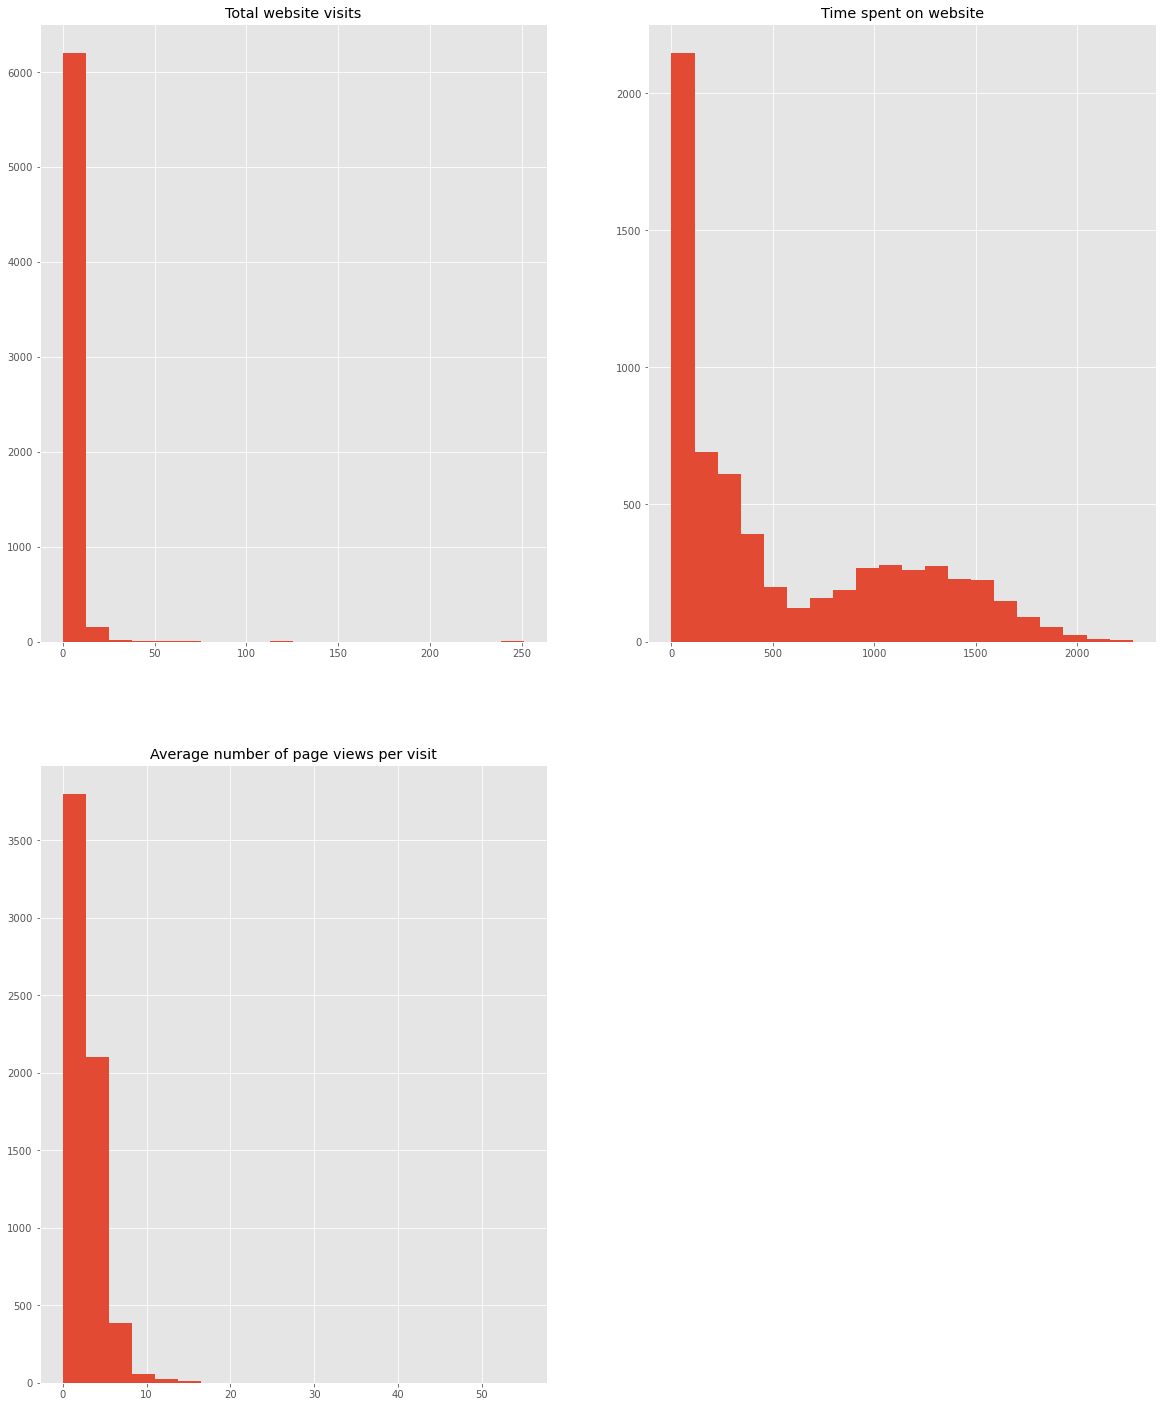

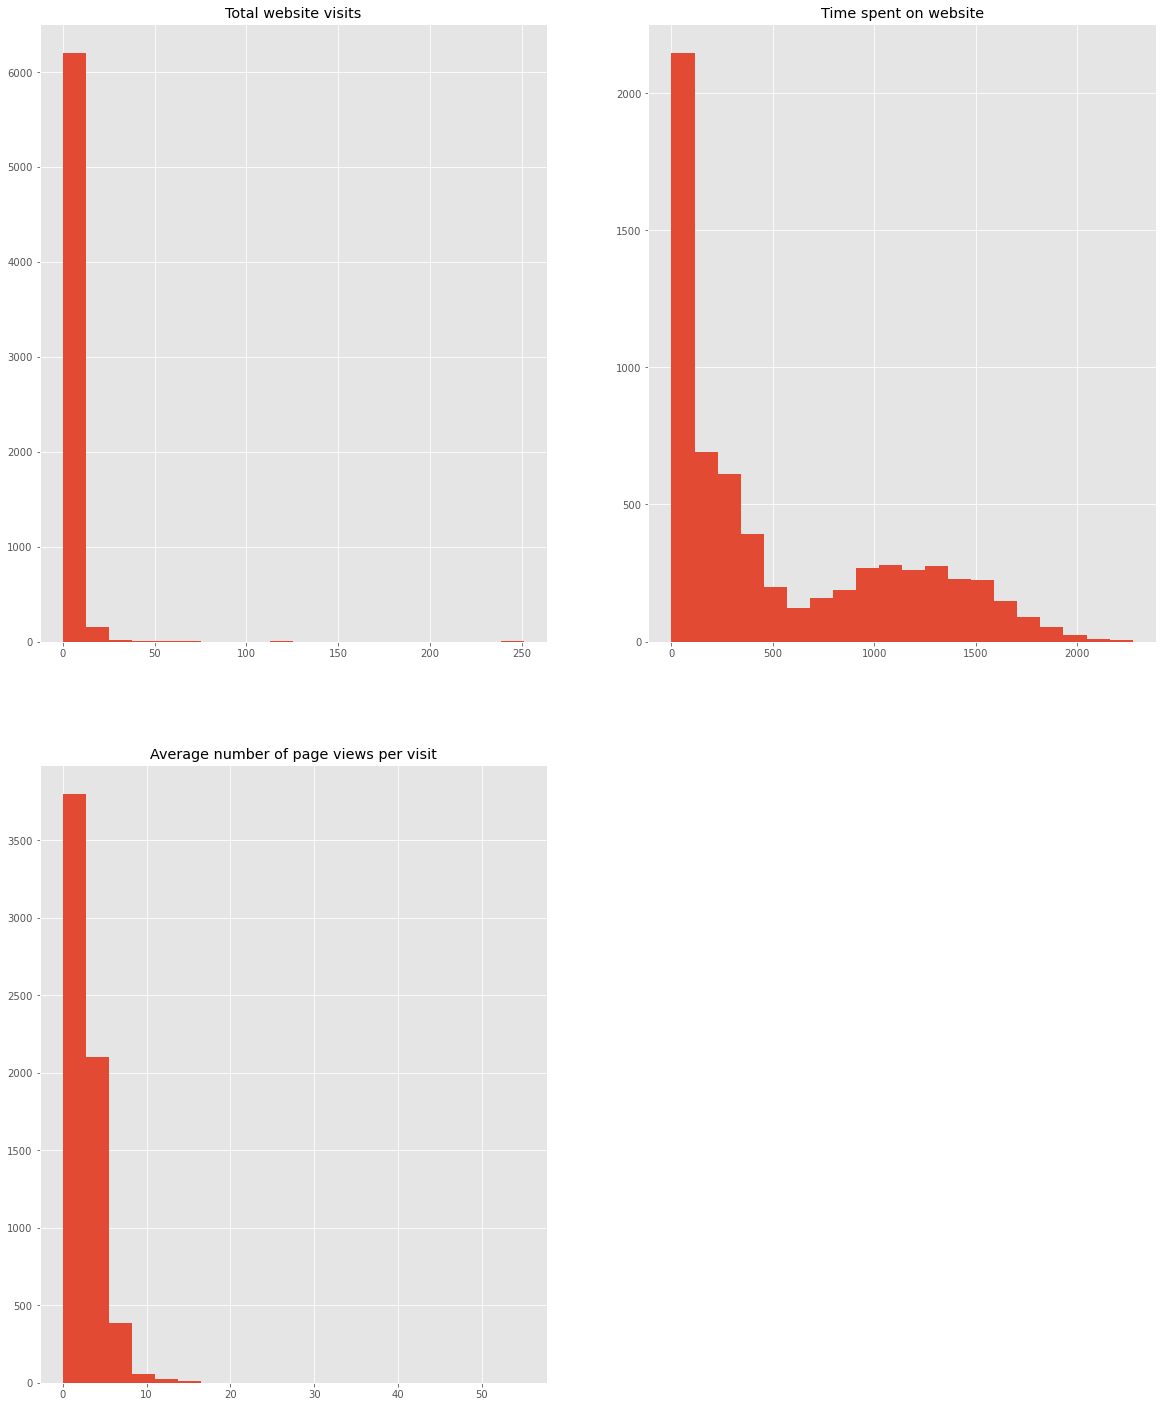

In [ ]:
# Set style
plt.style.use('ggplot')

# See distribution in each of the columns

fig = plt.figure(figsize = (20, 25))
plt.subplot(2, 2, 1)
plt.hist(df.TotalVisits, bins = 20)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(df.Total_Time_Spent_on_Website, bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(df.Page_Views_Per_Visit, bins = 20)
plt.title('Average number of page views per visit')

plt.show()

High peaks and skewed data. By this we can say that there is possibility of outliers

# Heatmap

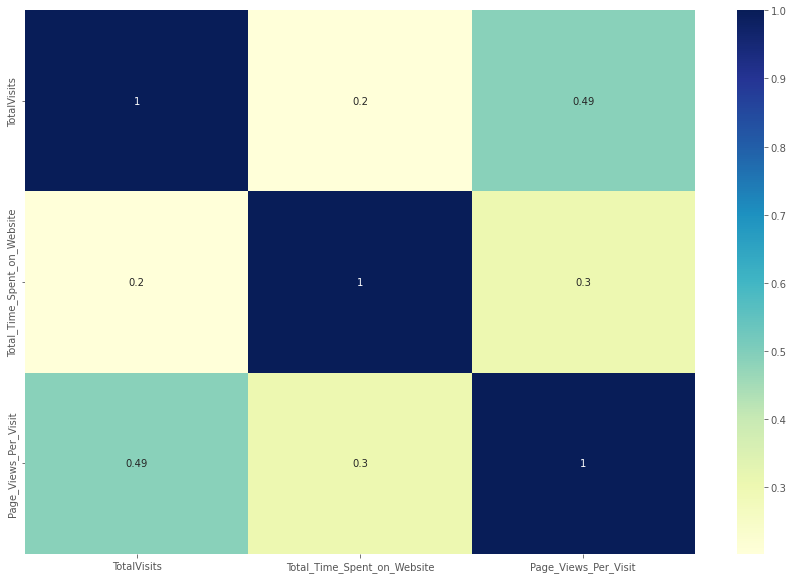

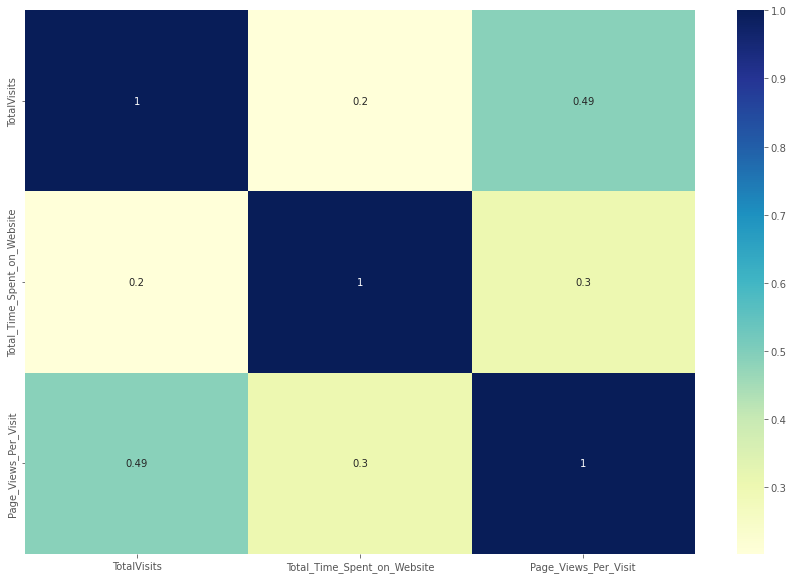

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df[['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

From this we can conculde that there is no significaqnt correlation such that columns can be dropped

Checking outliers

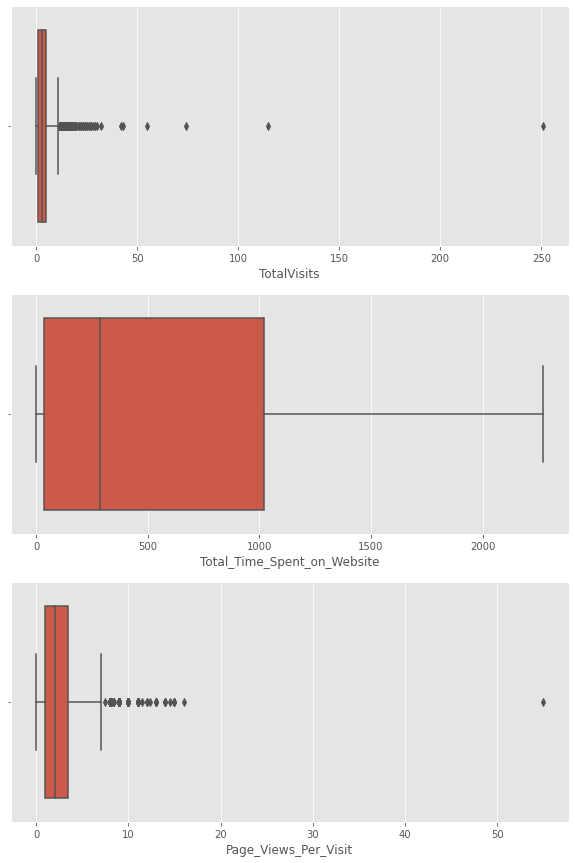

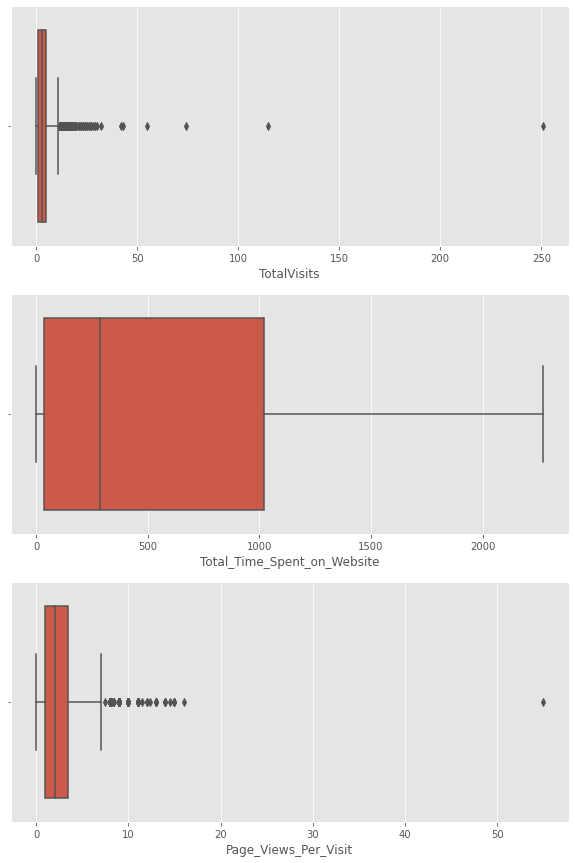

In [ ]:
plt.figure(figsize = (10, 15))

plt.subplot(3,1,1)
sns.boxplot(df.TotalVisits)

plt.subplot(3,1,2)
sns.boxplot(df.Total_Time_Spent_on_Website)

plt.subplot(3,1,3)
sns.boxplot(df.Page_Views_Per_Visit)
plt.show()

By this we can say that there are upper bound outliers in both total_visits and page_views_per_visit columns

Now checking the Categorical columns

# Categorical columns

Lead_Origin

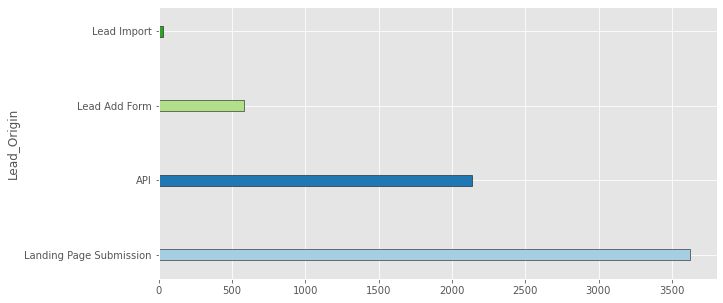

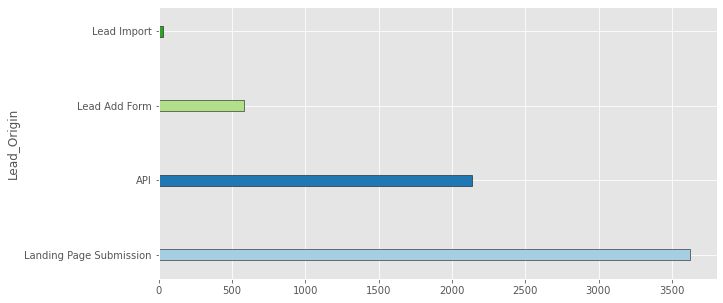

In [ ]:
plt.figure(figsize = (10, 5))

df.groupby('Lead_Origin')['Lead_Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.15, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

Lead_Source

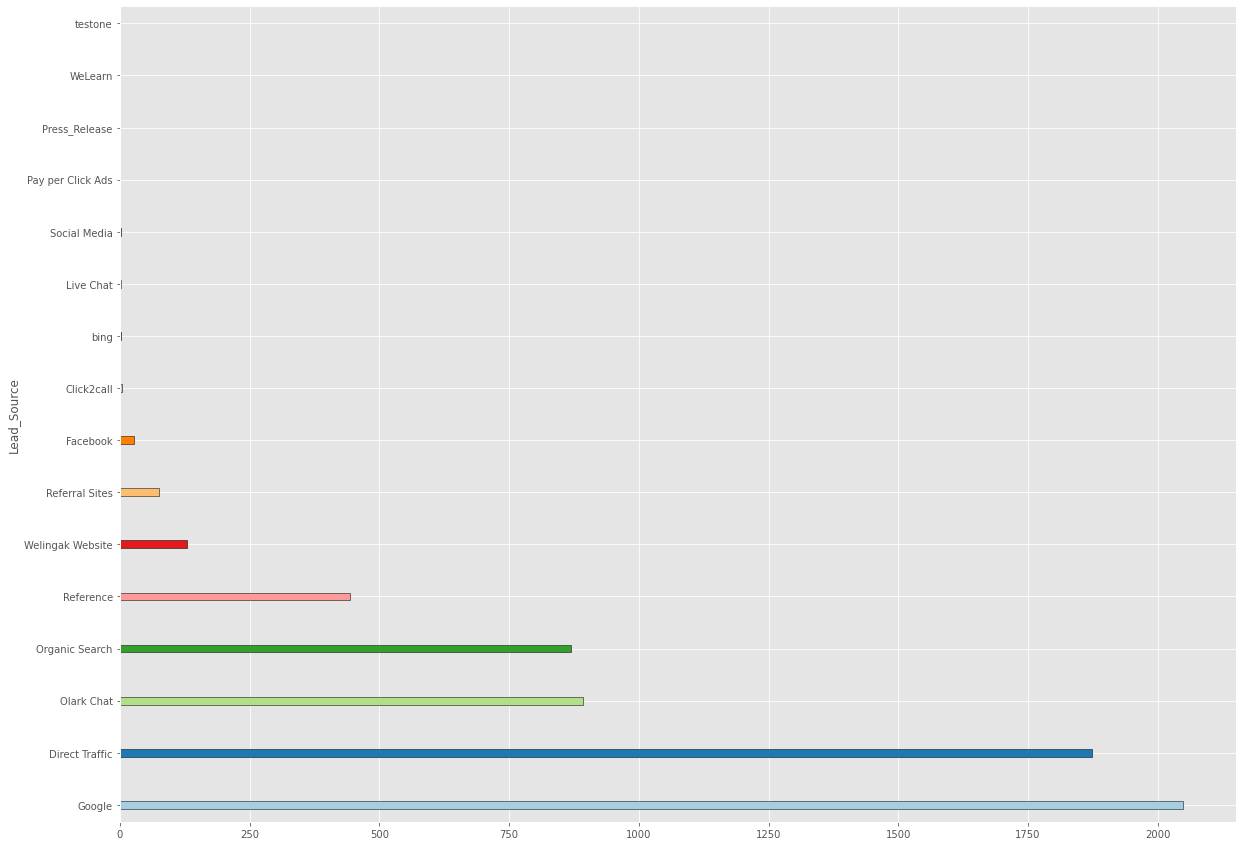

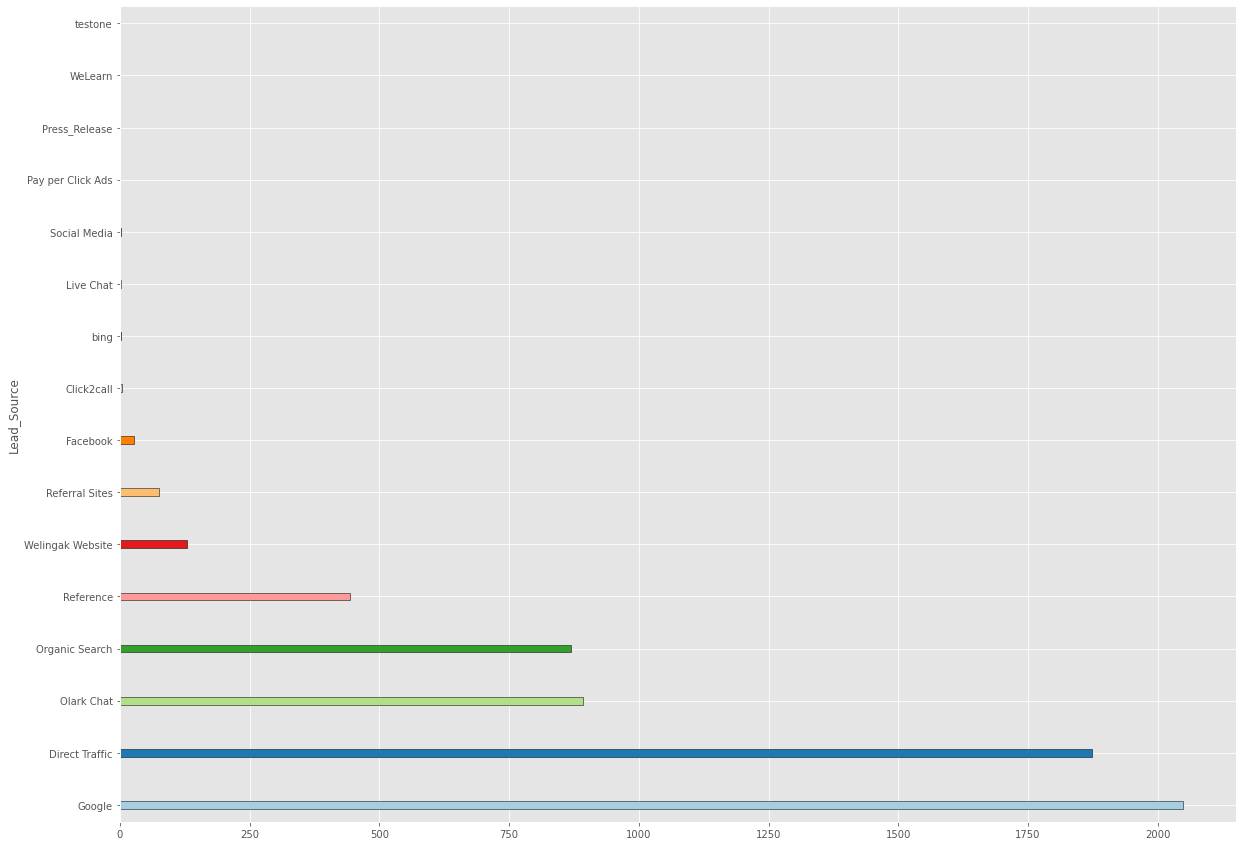

In [ ]:
plt.figure(figsize = (20,15))

df.groupby('Lead_Source')['Lead_Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.15, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

Specialization

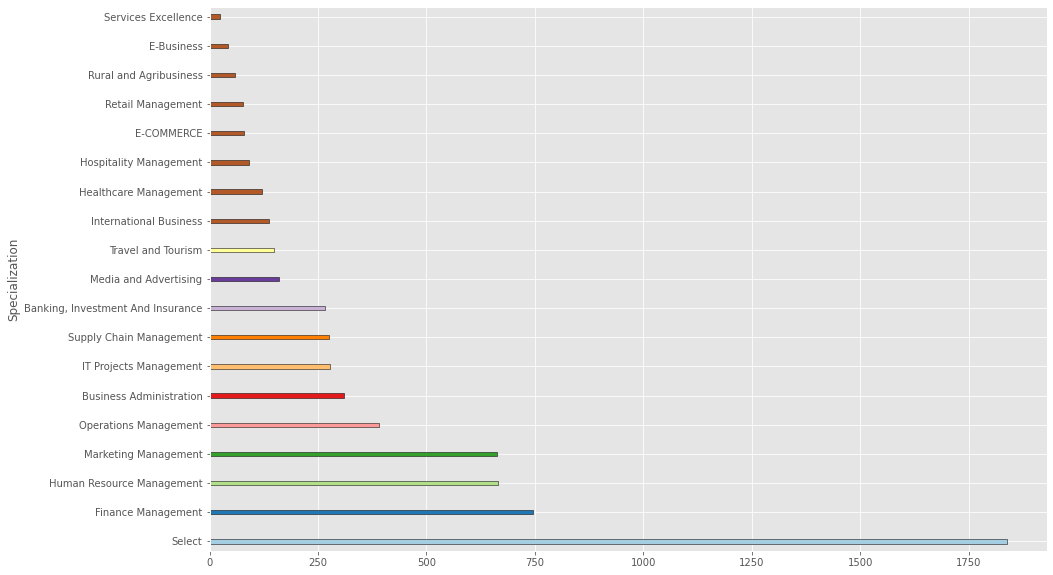

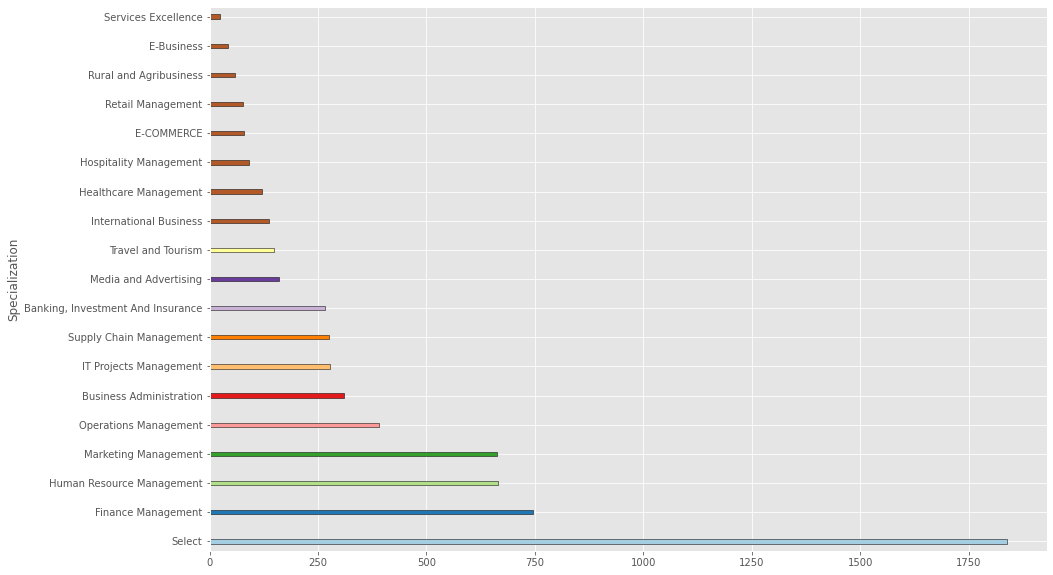

In [ ]:
plt.figure(figsize = (15, 10))

df.groupby('Specialization')['Lead_Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.15, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

Current Occuipation

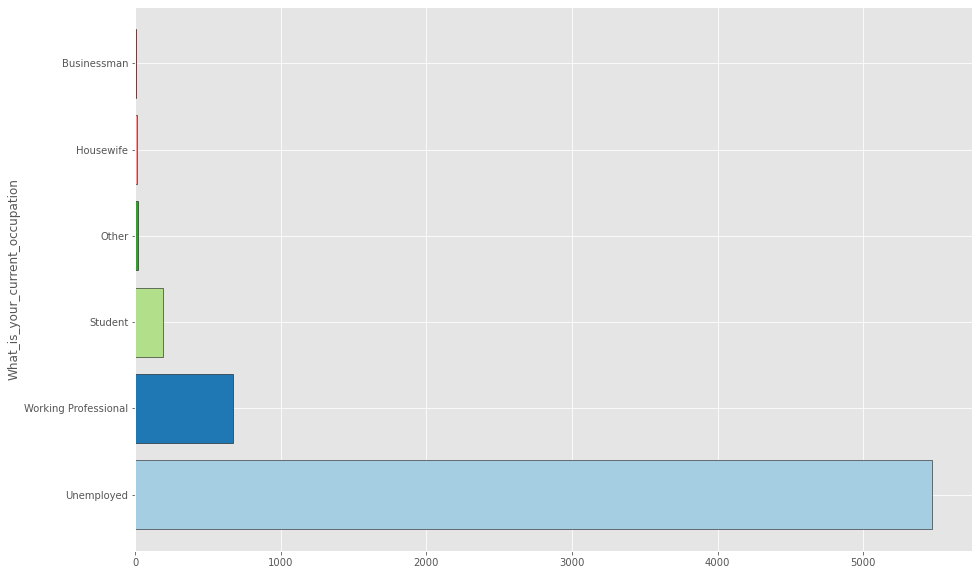

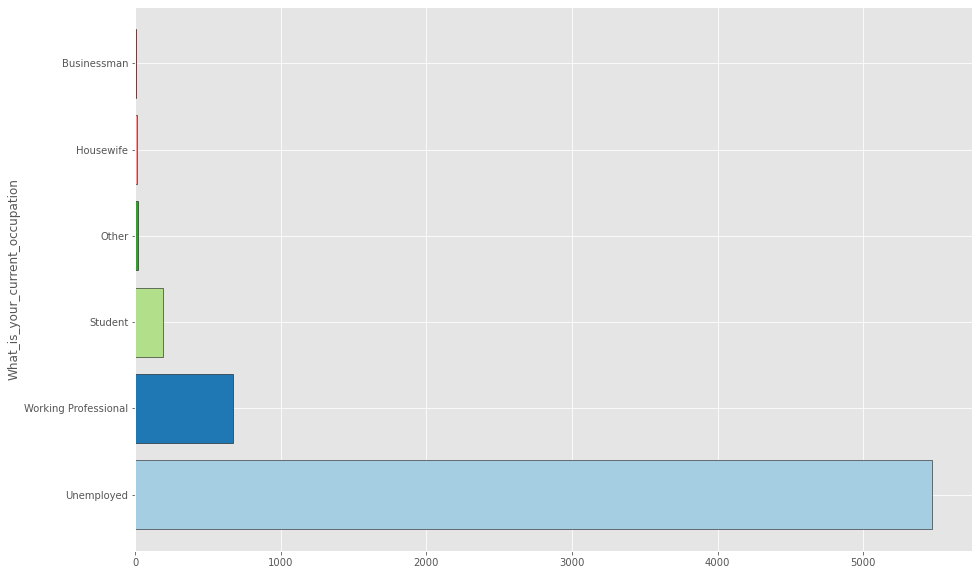

In [ ]:
plt.figure(figsize = (15, 10))

df.groupby('What_is_your_current_occupation')['Lead_Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

# dummy creation

Next step is Creating dummy variable for the categorical columns and dropping the first one.


In [ ]:
temp = df.loc[:, df.dtypes == 'object']
temp.columns

Index(['Lead_Origin', 'Lead_Source', 'Do_Not_Email', 'Last_Activity',
       'Specialization', 'What_is_your_current_occupation',
       'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity'],
      dtype='object')

Index(['Lead_Origin', 'Lead_Source', 'Do_Not_Email', 'Last_Activity',
       'Specialization', 'What_is_your_current_occupation',
       'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity'],
      dtype='object')

In [ ]:
dummy_1 = pd.get_dummies(df[['Lead_Origin', 'Lead_Source','A_free_copy_of_Mastering_The_Interview','Last_Notable_Activity', 'Last_Activity','Do_Not_Email','Specialization', 'What_is_your_current_occupation']], drop_first = True)

# Adding the results to original file
df = pd.concat([df, dummy_1], axis=1)

Now dropping the values for which we have created dummy variable 

In [ ]:
df.drop(['Lead_Origin', 'Lead_Source','A_free_copy_of_Mastering_The_Interview','Last_Notable_Activity', 'Last_Activity','Do_Not_Email','Specialization', 'What_is_your_current_occupation'], axis = 1, inplace = True)

df.head()

Lead_Number  Converted  TotalVisits  Total_Time_Spent_on_Website  \
0       660737          0          0.0                            0   
1       660728          0          5.0                          674   
2       660727          1          2.0                         1532   
3       660719          0          1.0                          305   
4       660681          1          2.0                         1428   

   Page_Views_Per_Visit  Lead_Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead_Source_Live Chat  Lead_Source_Olark Chat  Lead_Source_Organic Search  \
0                      0                       1                           0   
1                      0                       0                           1   
2                      0                       0                           0   
3                      0                       0                           0   
4                      0                       0                           0   

   Lead_Source_Pay per Click Ads  Lead_Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead_Source_Reference  Lead_Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead_Source_Social Media  Lead_Source_WeLearn  \
0                         0                    0   
1                         0                    0   
2                         0                    0   
3                         0                    0   
4                         0                    0   

   Lead_Source_Welingak Website  Lead_Source_bing  Lead_Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   A_free_copy_of_Mastering_The_Interview_Yes  \
0                                           0   
1                                           0   
2                                           1   
3                                           0   
4                                           0   

   Last_Notable_Activity_Email Bounced  ...  \
0                                    0  ...   
1                                    0  ...   
2     

Lead_Number  Converted  TotalVisits  Total_Time_Spent_on_Website  \
0       660737          0          0.0                            0   
1       660728          0          5.0                          674   
2       660727          1          2.0                         1532   
3       660719          0          1.0                          305   
4       660681          1          2.0                         1428   

   Page_Views_Per_Visit  Lead_Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead_Source_Live Chat  Lead_Source_Olark Chat  Lead_Source_Organic Search  \
0                      0                       1                           0   
1                      0                       0                           1   
2                      0                       0                           0   
3                      0                       0                           0   
4                      0                       0                           0   

   Lead_Source_Pay per Click Ads  Lead_Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead_Source_Reference  Lead_Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead_Source_Social Media  Lead_Source_WeLearn  \
0                         0                    0   
1                         0                    0   
2                         0                    0   
3                         0                    0   
4                         0                    0   

   Lead_Source_Welingak Website  Lead_Source_bing  Lead_Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   A_free_copy_of_Mastering_The_Interview_Yes  \
0                                           0   
1                                           0   
2                                           1   
3                                           0   
4                                           0   

   Last_Notable_Activity_Email Bounced  ...  \
0                                    0  ...   
1                                    0  ...   
2     

# Test-Train Split

Now spliting the dataset into training an testing

In [ ]:
# Put all the feature variables in X

X = df.drop(['Converted'], 1)
X.head()

Lead_Number  TotalVisits  Total_Time_Spent_on_Website  \
0       660737          0.0                            0   
1       660728          5.0                          674   
2       660727          2.0                         1532   
3       660719          1.0                          305   
4       660681          2.0                         1428   

   Page_Views_Per_Visit  Lead_Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead_Source_Live Chat  Lead_Source_Olark Chat  Lead_Source_Organic Search  \
0                      0                       1                           0   
1                      0                       0                           1   
2                      0                       0                           0   
3                      0                       0                           0   
4                      0                       0                           0   

   Lead_Source_Pay per Click Ads  Lead_Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead_Source_Reference  Lead_Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead_Source_Social Media  Lead_Source_WeLearn  \
0                         0                    0   
1                         0                    0   
2                         0                    0   
3                         0                    0   
4                         0                    0   

   Lead_Source_Welingak Website  Lead_Source_bing  Lead_Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   A_free_copy_of_Mastering_The_Interview_Yes  \
0                                           0   
1                                           0   
2                                           1   
3                                           0   
4                                           0   

   Last_Notable_Activity_Email Bounced  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4  

Lead_Number  TotalVisits  Total_Time_Spent_on_Website  \
0       660737          0.0                            0   
1       660728          5.0                          674   
2       660727          2.0                         1532   
3       660719          1.0                          305   
4       660681          2.0                         1428   

   Page_Views_Per_Visit  Lead_Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead_Source_Live Chat  Lead_Source_Olark Chat  Lead_Source_Organic Search  \
0                      0                       1                           0   
1                      0                       0                           1   
2                      0                       0                           0   
3                      0                       0                           0   
4                      0                       0                           0   

   Lead_Source_Pay per Click Ads  Lead_Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead_Source_Reference  Lead_Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead_Source_Social Media  Lead_Source_WeLearn  \
0                         0                    0   
1                         0                    0   
2                         0                    0   
3                         0                    0   
4                         0                    0   

   Lead_Source_Welingak Website  Lead_Source_bing  Lead_Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   A_free_copy_of_Mastering_The_Interview_Yes  \
0                                           0   
1                                           0   
2                                           1   
3                                           0   
4                                           0   

   Last_Notable_Activity_Email Bounced  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4  

In [ ]:
# Put the target variable in y

y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

Now will split the dataset in 70:30. 70% in train and 30% in test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
X_train.head()

Lead_Number  TotalVisits  Total_Time_Spent_on_Website  \
8003       588514          4.0                           67   
218        658206          4.0                          187   
4171       619890          6.0                           78   
4037       621270          0.0                            0   
3660       625185          0.0                            0   

      Page_Views_Per_Visit  Lead_Origin_Landing Page Submission  \
8003                   2.0                                    1   
218                    4.0                                    1   
4171                   6.0                                    1   
4037                   0.0                                    0   
3660                   0.0                                    0   

      Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  \
8003                          0                        0   
218                           0                        0   
4171                          0                        0   
4037                          0                        0   
3660                          1                        0   

      Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
8003                           1                     0                   0   
218                            1                     0                   0   
4171                           1                     0                   0   
4037                           0                     0                   0   
3660                           0                     0                   0   

      Lead_Source_Live Chat  Lead_Source_Olark Chat  \
8003                      0                       0   
218                       0                       0   
4171                      0                       0   
4037                      0                       1   
3660                      0                       0   

      Lead_Source_Organic Search  Lead_Source_Pay per Click Ads  \
8003                           0                              0   
218                            0                              0   
4171                           0                              0   
4037                           0                              0   
3660                           0                              0   

      Lead_Source_Press_Release  Lead_Source_Reference  \
8003                          0                      0   
218                           0                      0   
4171                          0                      0   
4037                          0                      0   
3660                          0                      1   

      Lead_Source_Referral Sites  Lead_Source_Social Media  \
8003                           0                         0   
218                            0                         0   
4171                           0                         0   
4037                           0                         0   
3660                           0                         0   

      Lead_Source_WeLearn  Lead_Source_Welingak Website  Lead_Source_bing  \
8003                    0                             0                 0   
218                     0                             0                 0   
4171                    0                             0                 0   
4037                    0                             0                 0   
3660                    0                             0                 0   

      Lead_Source_testone  A_free_copy_of_Mastering_The_Interview_Yes  \
8003                    0                                           1   
218                     0                                           1   
4171                    0                                           1   
4037                    0                                           0   
3660                    0                                           0   

      Last_Notable_Activity_Email Bo

Lead_Number  TotalVisits  Total_Time_Spent_on_Website  \
8003       588514          4.0                           67   
218        658206          4.0                          187   
4171       619890          6.0                           78   
4037       621270          0.0                            0   
3660       625185          0.0                            0   

      Page_Views_Per_Visit  Lead_Origin_Landing Page Submission  \
8003                   2.0                                    1   
218                    4.0                                    1   
4171                   6.0                                    1   
4037                   0.0                                    0   
3660                   0.0                                    0   

      Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  \
8003                          0                        0   
218                           0                        0   
4171                          0                        0   
4037                          0                        0   
3660                          1                        0   

      Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
8003                           1                     0                   0   
218                            1                     0                   0   
4171                           1                     0                   0   
4037                           0                     0                   0   
3660                           0                     0                   0   

      Lead_Source_Live Chat  Lead_Source_Olark Chat  \
8003                      0                       0   
218                       0                       0   
4171                      0                       0   
4037                      0                       1   
3660                      0                       0   

      Lead_Source_Organic Search  Lead_Source_Pay per Click Ads  \
8003                           0                              0   
218                            0                              0   
4171                           0                              0   
4037                           0                              0   
3660                           0                              0   

      Lead_Source_Press_Release  Lead_Source_Reference  \
8003                          0                      0   
218                           0                      0   
4171                          0                      0   
4037                          0                      0   
3660                          0                      1   

      Lead_Source_Referral Sites  Lead_Source_Social Media  \
8003                           0                         0   
218                            0                         0   
4171                           0                         0   
4037                           0                         0   
3660                           0                         0   

      Lead_Source_WeLearn  Lead_Source_Welingak Website  Lead_Source_bing  \
8003                    0                             0                 0   
218                     0                             0                 0   
4171                    0                             0                 0   
4037                    0                             0                 0   
3660                    0                             0                 0   

      Lead_Source_testone  A_free_copy_of_Mastering_The_Interview_Yes  \
8003                    0                                           1   
218                     0                                           1   
4171                    0                                           1   
4037                    0                                           0   
3660                    0                                           0   

      Last_Notable_Activity_Email Bo

# Scaling

There are few numeric variables present in the dataset which have different scales. So will scale these variables.

In [ ]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page_Views_Per_Visit', 'Total_Time_Spent_on_Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page_Views_Per_Visit', 'Total_Time_Spent_on_Website']])

X_train.head()

Lead_Number  TotalVisits  Total_Time_Spent_on_Website  \
8003       588514     0.015936                     0.029489   
218        658206     0.015936                     0.082306   
4171       619890     0.023904                     0.034331   
4037       621270     0.000000                     0.000000   
3660       625185     0.000000                     0.000000   

      Page_Views_Per_Visit  Lead_Origin_Landing Page Submission  \
8003                 0.125                                    1   
218                  0.250                                    1   
4171                 0.375                                    1   
4037                 0.000                                    0   
3660                 0.000                                    0   

      Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  \
8003                          0                        0   
218                           0                        0   
4171                          0                        0   
4037                          0                        0   
3660                          1                        0   

      Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
8003                           1                     0                   0   
218                            1                     0                   0   
4171                           1                     0                   0   
4037                           0                     0                   0   
3660                           0                     0                   0   

      Lead_Source_Live Chat  Lead_Source_Olark Chat  \
8003                      0                       0   
218                       0                       0   
4171                      0                       0   
4037                      0                       1   
3660                      0                       0   

      Lead_Source_Organic Search  Lead_Source_Pay per Click Ads  \
8003                           0                              0   
218                            0                              0   
4171                           0                              0   
4037                           0                              0   
3660                           0                              0   

      Lead_Source_Press_Release  Lead_Source_Reference  \
8003                          0                      0   
218                           0                      0   
4171                          0                      0   
4037                          0                      0   
3660                          0                      1   

      Lead_Source_Referral Sites  Lead_Source_Social Media  \
8003                           0                         0   
218                            0                         0   
4171                           0                         0   
4037                           0                         0   
3660                           0                         0   

      Lead_Source_WeLearn  Lead_Source_Welingak Website  Lead_Source_bing  \
8003                    0                             0                 0   
218                     0                             0                 0   
4171                    0                             0                 0   
4037                    0                             0                 0   
3660                    0                             0                 0   

      Lead_Source_testone  A_free_copy_of_Mastering_The_Interview_Yes  \
8003                    0                                           1   
218                     0                                           1   
4171                    0                                           1   
4037                    0                                           0   
3660                    0                                           0   

      Last_Notable_Activity_Email Bo

Lead_Number  TotalVisits  Total_Time_Spent_on_Website  \
8003       588514     0.015936                     0.029489   
218        658206     0.015936                     0.082306   
4171       619890     0.023904                     0.034331   
4037       621270     0.000000                     0.000000   
3660       625185     0.000000                     0.000000   

      Page_Views_Per_Visit  Lead_Origin_Landing Page Submission  \
8003                 0.125                                    1   
218                  0.250                                    1   
4171                 0.375                                    1   
4037                 0.000                                    0   
3660                 0.000                                    0   

      Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  \
8003                          0                        0   
218                           0                        0   
4171                          0                        0   
4037                          0                        0   
3660                          1                        0   

      Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
8003                           1                     0                   0   
218                            1                     0                   0   
4171                           1                     0                   0   
4037                           0                     0                   0   
3660                           0                     0                   0   

      Lead_Source_Live Chat  Lead_Source_Olark Chat  \
8003                      0                       0   
218                       0                       0   
4171                      0                       0   
4037                      0                       1   
3660                      0                       0   

      Lead_Source_Organic Search  Lead_Source_Pay per Click Ads  \
8003                           0                              0   
218                            0                              0   
4171                           0                              0   
4037                           0                              0   
3660                           0                              0   

      Lead_Source_Press_Release  Lead_Source_Reference  \
8003                          0                      0   
218                           0                      0   
4171                          0                      0   
4037                          0                      0   
3660                          0                      1   

      Lead_Source_Referral Sites  Lead_Source_Social Media  \
8003                           0                         0   
218                            0                         0   
4171                           0                         0   
4037                           0                         0   
3660                           0                         0   

      Lead_Source_WeLearn  Lead_Source_Welingak Website  Lead_Source_bing  \
8003                    0                             0                 0   
218                     0                             0                 0   
4171                    0                             0                 0   
4037                    0                             0                 0   
3660                    0                             0                 0   

      Lead_Source_testone  A_free_copy_of_Mastering_The_Interview_Yes  \
8003                    0                                           1   
218                     0                                           1   
4171                    0                                           1   
4037                    0                                           0   
3660                    0                                           0   

      Last_Notable_Activity_Email Bo

# Checking Correlations

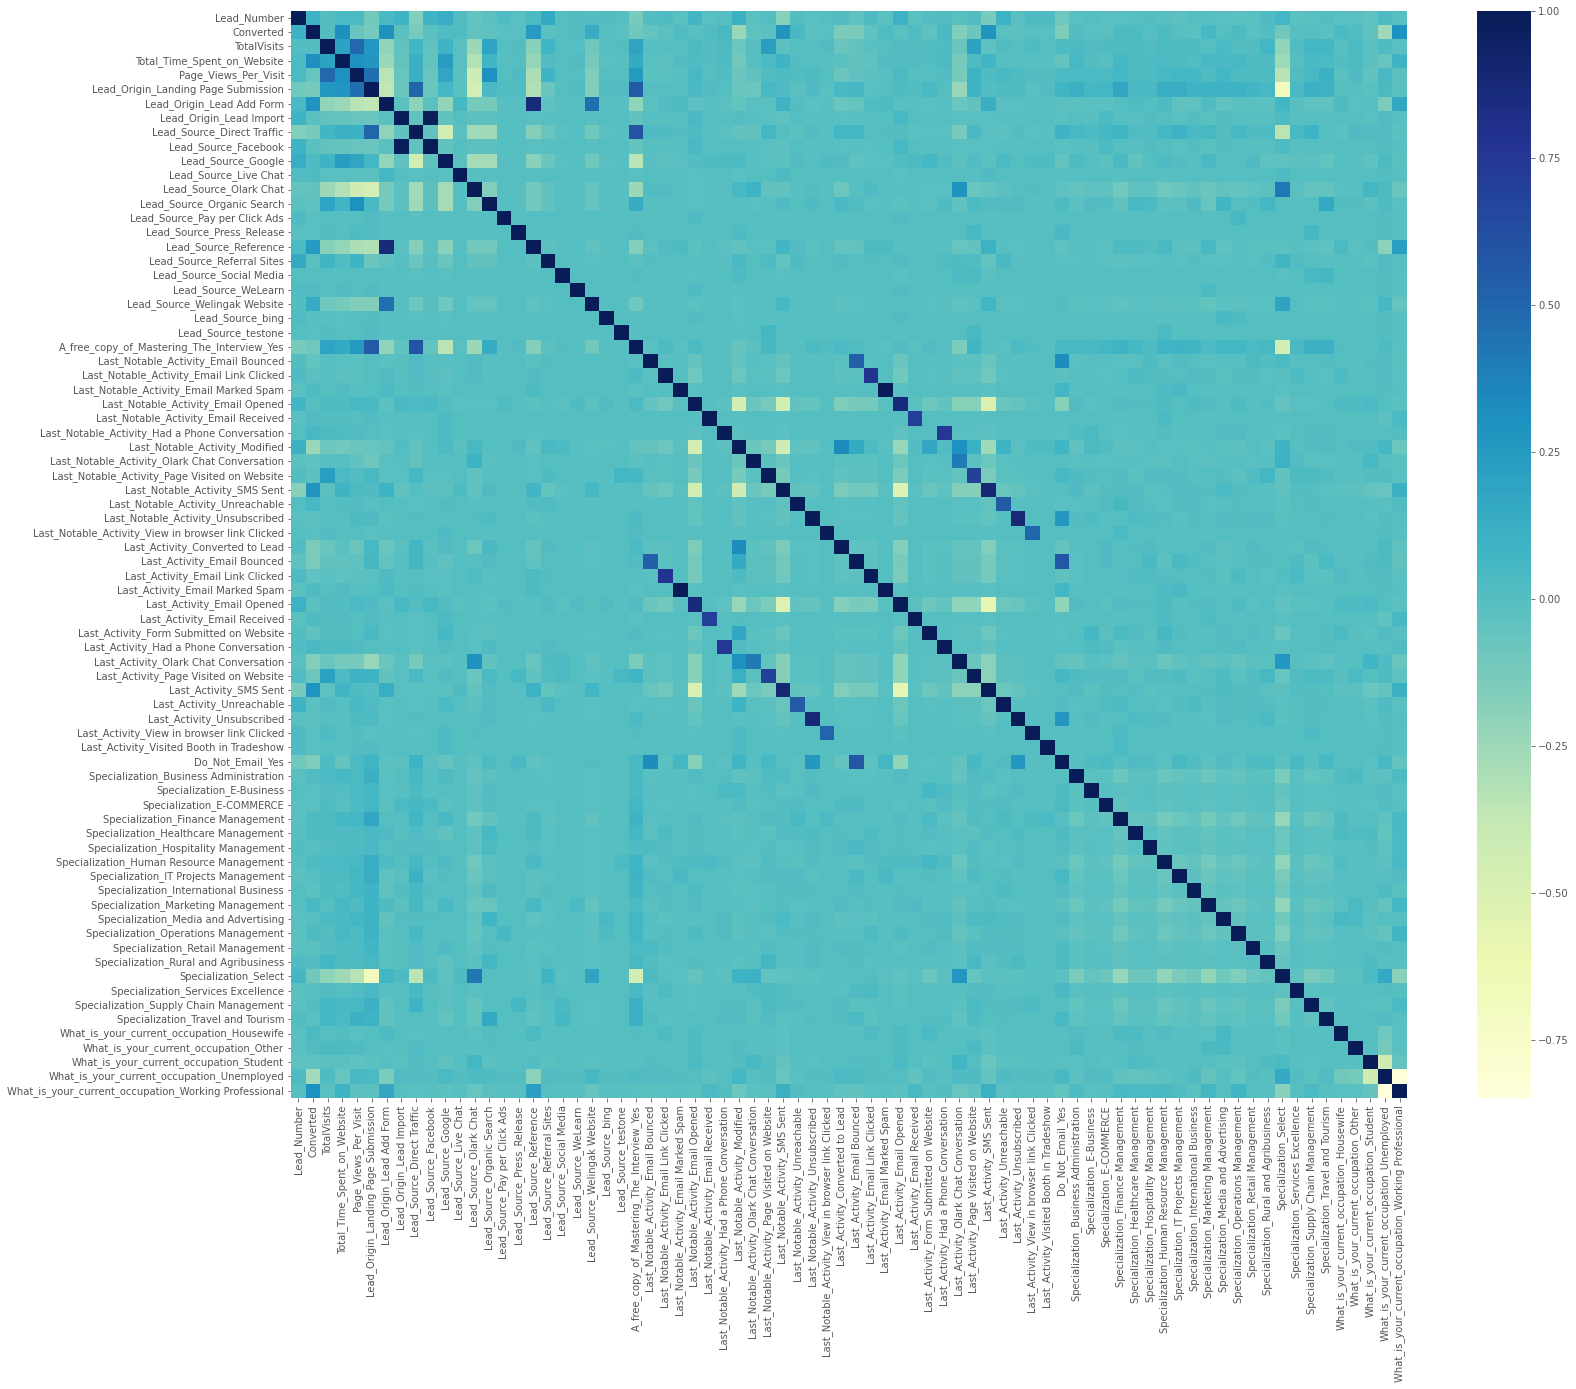

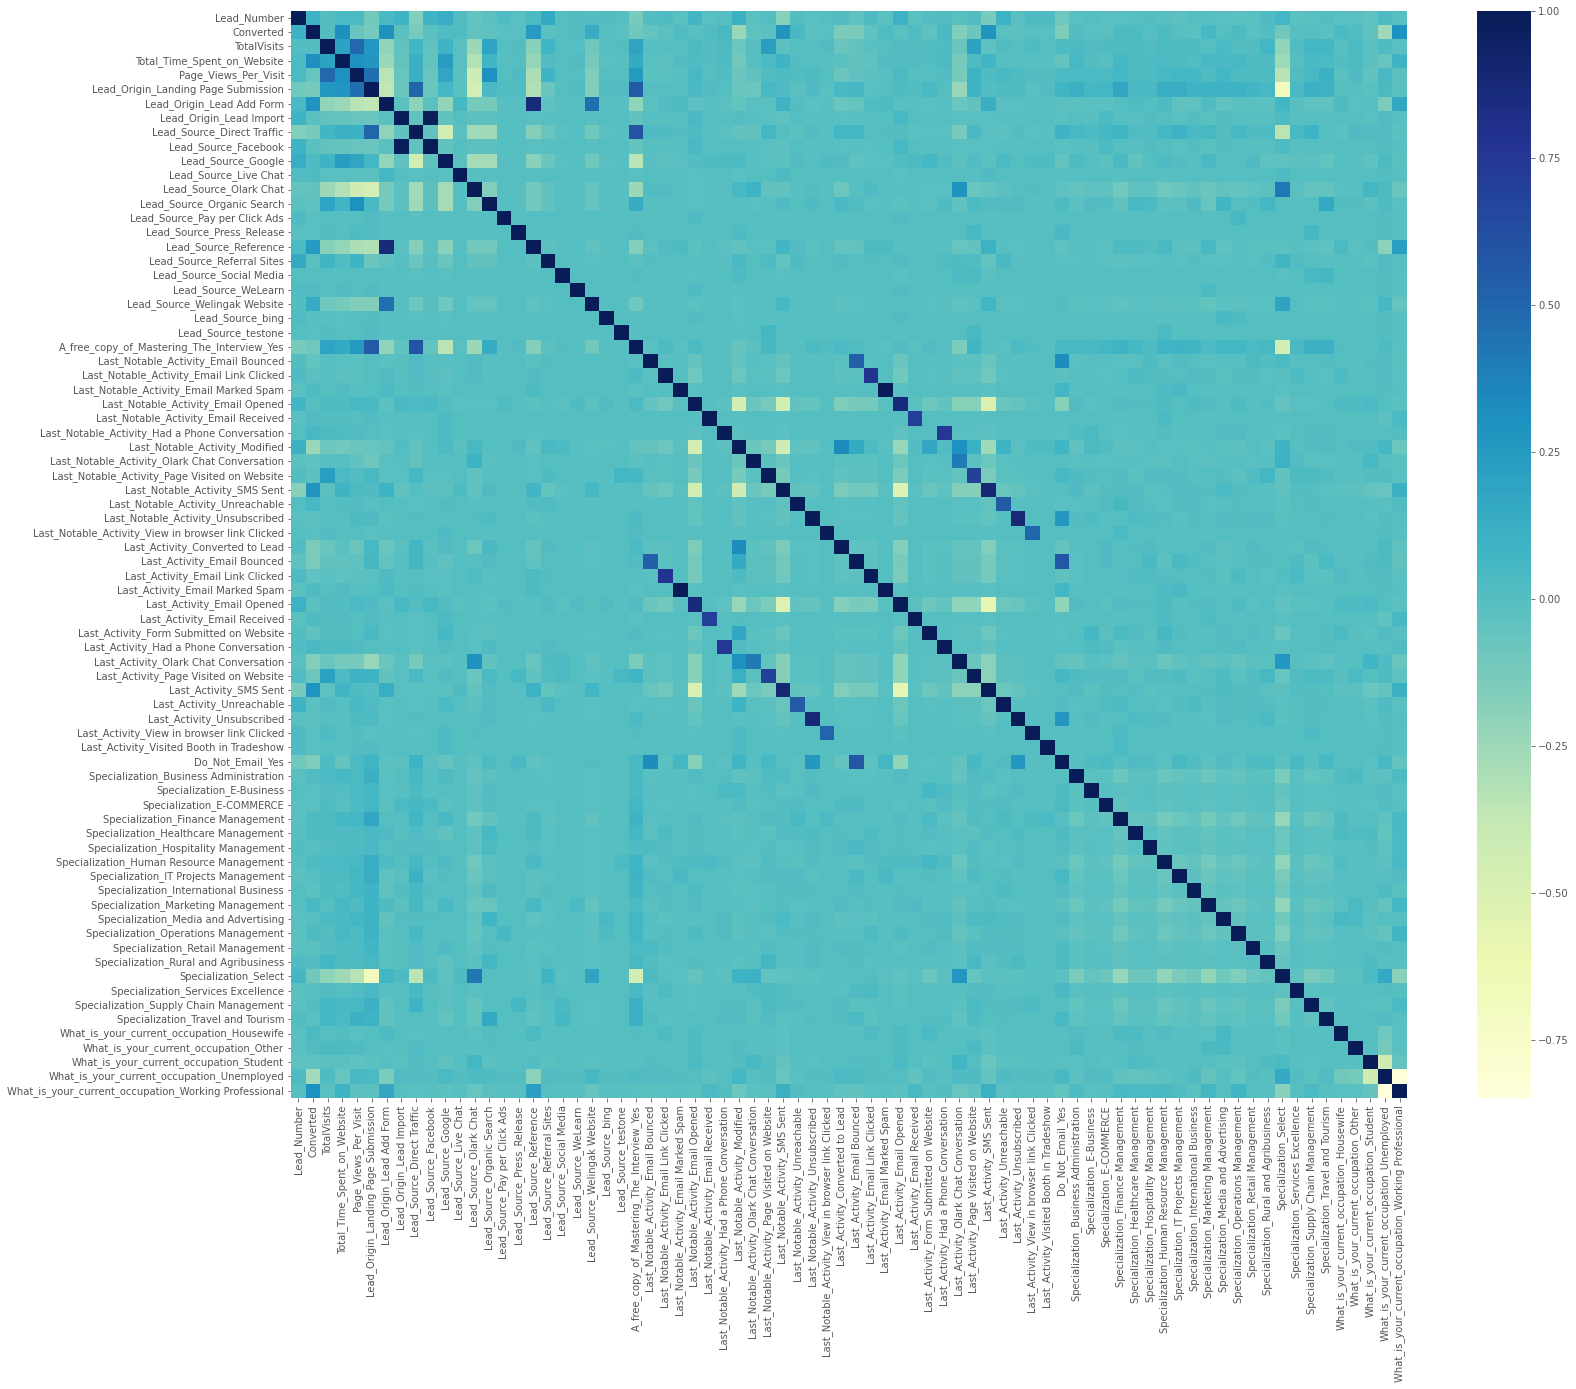

In [ ]:
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), cmap="YlGnBu")
plt.show()

Now we will create a Model to test this

# Model Building

Let's build the model. There are variable which we cannot use hence, let's select a small set of features from this pool of variables using RFE.

In [ ]:
# initiate logistic regression
logreg = LogisticRegression()

rfe = RFE(estimator= logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([ True, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True])

array([ True, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead_Number', True, 1),
 ('TotalVisits', False, 57),
 ('Total_Time_Spent_on_Website', True, 1),
 ('Page_Views_Per_Visit', False, 10),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 41),
 ('Lead_Source_Direct Traffic', True, 1),
 ('Lead_Source_Facebook', False, 40),
 ('Lead_Source_Google', False, 11),
 ('Lead_Source_Live Chat', False, 45),
 ('Lead_Source_Olark Chat', False, 6),
 ('Lead_Source_Organic Search', False, 8),
 ('Lead_Source_Pay per Click Ads', False, 54),
 ('Lead_Source_Press_Release', False, 51),
 ('Lead_Source_Reference', True, 1),
 ('Lead_Source_Referral Sites', False, 30),
 ('Lead_Source_Social Media', False, 59),
 ('Lead_Source_WeLearn', False, 49),
 ('Lead_Source_Welingak Website', False, 4),
 ('Lead_Source_bing', False, 46),
 ('Lead_Source_testone', False, 52),
 ('A_free_copy_of_Mastering_The_Interview_Yes', True, 1),
 ('Last_Notable_Activity_Email Bounced', False, 22),
 ('Last_Notable_

[('Lead_Number', True, 1),
 ('TotalVisits', False, 57),
 ('Total_Time_Spent_on_Website', True, 1),
 ('Page_Views_Per_Visit', False, 10),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 41),
 ('Lead_Source_Direct Traffic', True, 1),
 ('Lead_Source_Facebook', False, 40),
 ('Lead_Source_Google', False, 11),
 ('Lead_Source_Live Chat', False, 45),
 ('Lead_Source_Olark Chat', False, 6),
 ('Lead_Source_Organic Search', False, 8),
 ('Lead_Source_Pay per Click Ads', False, 54),
 ('Lead_Source_Press_Release', False, 51),
 ('Lead_Source_Reference', True, 1),
 ('Lead_Source_Referral Sites', False, 30),
 ('Lead_Source_Social Media', False, 59),
 ('Lead_Source_WeLearn', False, 49),
 ('Lead_Source_Welingak Website', False, 4),
 ('Lead_Source_bing', False, 46),
 ('Lead_Source_testone', False, 52),
 ('A_free_copy_of_Mastering_The_Interview_Yes', True, 1),
 ('Last_Notable_Activity_Email Bounced', False, 22),
 ('Last_Notable_

In [ ]:
# Put all the columns selected by RFE in the variable 'Var'

Var = X_train.columns[rfe.support_]

All the variables has been selected by RFE now let's use these variables and create a logistic regression model using statsmodels.

In [ ]:
# Select only the columns selected by RFE

X_train = X_train[Var]

In [ ]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sum = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sum, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2020.0
Date:                Sat, 31 Dec 2022   Deviance:                       4040.1
Time:                        16:38:04   Pearson chi2:                 4.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3808
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.3950      1.103     -6.701      0.000      -9.558      -5.232
Lead_Number                                           1.252e-05   1.76e-06      7.124      0.000    9.08e-06     1.6e-05
Total_Time_Spent_on_Website                              3.7545      0.173     21.736      0.000       3.416       4.093
Lead_Origin_Landing Page Submission                     -1.1837      0.138     -8.559      0.000      -1.455      -0.913
Lead_Origin_Lead Add Form                                4.8408      0.725      6.679      0.000       3.420       6.261
Lead_Source_Direct Traffic                              -0.3079      0.109     -2.834      0.005      -0.521      -0.095
Lead_Source_Reference                                   -1.8868      0.767     -2.460      0.014      -3.390      -0.384
A_free_copy_of_Mastering_The_Interview_Yes              -0.1484      0.108     -1.373      0.170      -0.360       0.063
Last_Notable_Activity_Modified                          -0.7749      0.106     -7.318      0.000      -0.982      -0.567
Last_Notable_Activity_SMS Sent                           0.5789      0.216      2.682      0.007       0.156       1.002
Last_Activity_Olark Chat Conversation                   -0.4511      0.197     -2.286      0.022      -0.838      -0.064
Last_Activity_SMS Sent                                   0.6060      0.193      3.132      0.002       0.227       0.985
Do_Not_Email_Yes                                        -1.2917      0.193     -6.708      0.000      -1.669      -0.914
Specialization_Select                                   -1.0189      0.138     -7.386      0.000      -1.289      -0.749
What_is_your_current_occupation_Unemployed              -0.6250      0.210     -2.971      0.003      -1.037      -0.213
What_is_your_current_occupation_Working Professional     1.8443      0.284      6.486      0.000       1.287       2.402
========================================================================================================================
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2020.0
Date:                Sat, 31 Dec 2022   Deviance:                       4040.1
Time:                        16:38:04   Pearson chi2:                 4.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3808
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.3950      1.103     -6.701      0.000      -9.558      -5.232
Lead_Number                                           1.252e-05   1.76e-06      7.124      0.000    9.08e-06     1.6e-05
Total_Time_Spent_on_Website                              3.7545      0.173     21.736      0.000       3.416       4.093
Lead_Origin_Landing Page Submission                     -1.1837      0.138     -8.559      0.000      -1.455      -0.913
Lead_Origin_Lead Add Form                                4.8408      0.725      6.679      0.000       3.420       6.261
Lead_Source_Direct Traffic                              -0.3079      0.109     -2.834      0.005      -0.521      -0.095
Lead_Source_Reference                                   -1.8868      0.767     -2.460      0.014      -3.390      -0.384
A_free_copy_of_Mastering_The_Interview_Yes              -0.1484      0.108     -1.373      0.170      -0.360       0.063
Last_Notable_Activity_Modified                          -0.7749      0.106     -7.318      0.000      -0.982      -0.567
Last_Notable_Activity_SMS Sent                           0.5789      0.216      2.682      0.007       0.156       1.002
Last_Activity_Olark Chat Conversation                   -0.4511      0.197     -2.286      0.022      -0.838      -0.064
Last_Activity_SMS Sent                                   0.6060      0.193      3.132      0.002       0.227       0.985
Do_Not_Email_Yes                                        -1.2917      0.193     -6.708      0.000      -1.669      -0.914
Specialization_Select                                   -1.0189      0.138     -7.386      0.000      -1.289      -0.749
What_is_your_current_occupation_Unemployed              -0.6250      0.210     -2.971      0.003      -1.037      -0.213
What_is_your_current_occupation_Working Professional     1.8443      0.284      6.486      0.000       1.287       2.402
========================================================================================================================
"""

There are variable which have a p-value greater than 0.05 let's also look at the VIFs.

In [ ]:
# Make a VIF dataframe for all the variables present

vif_dataframe = pd.DataFrame()
vif_dataframe['Features'] = X_train.columns
vif_dataframe['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_dataframe['VIF'] = round(vif_dataframe['VIF'], 2)
vif_dataframe = vif_dataframe.sort_values(by = "VIF", ascending = False)
vif_dataframe

Features    VIF
0                                         Lead_Number  37.34
13         What_is_your_current_occupation_Unemployed  25.84
8                      Last_Notable_Activity_SMS Sent   8.81
10                             Last_Activity_SMS Sent   8.48
2                 Lead_Origin_Landing Page Submission   6.76
3                           Lead_Origin_Lead Add Form   4.64
5                               Lead_Source_Reference   4.58
14  What_is_your_current_occupation_Working Profes...   4.09
12                              Specialization_Select   3.43
6          A_free_copy_of_Mastering_The_Interview_Yes   2.74
4                          Lead_Source_Direct Traffic   2.35
1                         Total_Time_Spent_on_Website   2.22
7                      Last_Notable_Activity_Modified   2.17
9               Last_Activity_Olark Chat Conversation   1.31
11                                   Do_Not_Email_Yes   1.11

Features    VIF
0                                         Lead_Number  37.34
13         What_is_your_current_occupation_Unemployed  25.84
8                      Last_Notable_Activity_SMS Sent   8.81
10                             Last_Activity_SMS Sent   8.48
2                 Lead_Origin_Landing Page Submission   6.76
3                           Lead_Origin_Lead Add Form   4.64
5                               Lead_Source_Reference   4.58
14  What_is_your_current_occupation_Working Profes...   4.09
12                              Specialization_Select   3.43
6          A_free_copy_of_Mastering_The_Interview_Yes   2.74
4                          Lead_Source_Direct Traffic   2.35
1                         Total_Time_Spent_on_Website   2.22
7                      Last_Notable_Activity_Modified   2.17
9               Last_Activity_Olark Chat Conversation   1.31
11                                   Do_Not_Email_Yes   1.11

VIFs seem to be in a decent range only we need to remove "Lead_Number" & "What_is_your_current_occupation_Unemployed" as it has high value

In [ ]:
X_train.drop('Lead_Number', axis = 1, inplace = True)

In [ ]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2045.8
Date:                Sat, 31 Dec 2022   Deviance:                       4091.6
Time:                        16:38:04   Pearson chi2:                 4.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3736
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2869      0.235      1.222      0.222      -0.173       0.747
Total_Time_Spent_on_Website                              3.7929      0.172     22.070      0.000       3.456       4.130
Lead_Origin_Landing Page Submission                     -1.1925      0.138     -8.659      0.000      -1.462      -0.923
Lead_Origin_Lead Add Form                                4.7765      0.723      6.602      0.000       3.358       6.195
Lead_Source_Direct Traffic                              -0.3834      0.108     -3.560      0.000      -0.595      -0.172
Lead_Source_Reference                                   -1.8577      0.765     -2.430      0.015      -3.356      -0.359
A_free_copy_of_Mastering_The_Interview_Yes              -0.1698      0.107     -1.581      0.114      -0.380       0.041
Last_Notable_Activity_Modified                          -0.7354      0.105     -7.006      0.000      -0.941      -0.530
Last_Notable_Activity_SMS Sent                           0.4003      0.214      1.870      0.061      -0.019       0.820
Last_Activity_Olark Chat Conversation                   -0.5250      0.195     -2.689      0.007      -0.908      -0.142
Last_Activity_SMS Sent                                   0.6393      0.193      3.305      0.001       0.260       1.018
Do_Not_Email_Yes                                        -1.3686      0.192     -7.125      0.000      -1.745      -0.992
Specialization_Select                                   -1.0020      0.137     -7.302      0.000      -1.271      -0.733
What_is_your_current_occupation_Unemployed              -0.5190      0.207     -2.509      0.012      -0.924      -0.114
What_is_your_current_occupation_Working Professional     1.8896      0.282      6.712      0.000       1.338       2.441
========================================================================================================================
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2045.8
Date:                Sat, 31 Dec 2022   Deviance:                       4091.6
Time:                        16:38:04   Pearson chi2:                 4.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3736
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2869      0.235      1.222      0.222      -0.173       0.747
Total_Time_Spent_on_Website                              3.7929      0.172     22.070      0.000       3.456       4.130
Lead_Origin_Landing Page Submission                     -1.1925      0.138     -8.659      0.000      -1.462      -0.923
Lead_Origin_Lead Add Form                                4.7765      0.723      6.602      0.000       3.358       6.195
Lead_Source_Direct Traffic                              -0.3834      0.108     -3.560      0.000      -0.595      -0.172
Lead_Source_Reference                                   -1.8577      0.765     -2.430      0.015      -3.356      -0.359
A_free_copy_of_Mastering_The_Interview_Yes              -0.1698      0.107     -1.581      0.114      -0.380       0.041
Last_Notable_Activity_Modified                          -0.7354      0.105     -7.006      0.000      -0.941      -0.530
Last_Notable_Activity_SMS Sent                           0.4003      0.214      1.870      0.061      -0.019       0.820
Last_Activity_Olark Chat Conversation                   -0.5250      0.195     -2.689      0.007      -0.908      -0.142
Last_Activity_SMS Sent                                   0.6393      0.193      3.305      0.001       0.260       1.018
Do_Not_Email_Yes                                        -1.3686      0.192     -7.125      0.000      -1.745      -0.992
Specialization_Select                                   -1.0020      0.137     -7.302      0.000      -1.271      -0.733
What_is_your_current_occupation_Unemployed              -0.5190      0.207     -2.509      0.012      -0.924      -0.114
What_is_your_current_occupation_Working Professional     1.8896      0.282      6.712      0.000       1.338       2.441
========================================================================================================================
"""

In [ ]:
vif_dataframe = pd.DataFrame()
vif_dataframe['Features'] = X_train.columns
vif_dataframe['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_dataframe['VIF'] = round(vif_dataframe['VIF'], 2)
vif_dataframe = vif_dataframe.sort_values(by = "VIF", ascending = False)
vif_dataframe

Features   VIF
7                      Last_Notable_Activity_SMS Sent  8.80
9                              Last_Activity_SMS Sent  8.48
12         What_is_your_current_occupation_Unemployed  7.97
1                 Lead_Origin_Landing Page Submission  5.96
2                           Lead_Origin_Lead Add Form  4.63
4                               Lead_Source_Reference  4.52
11                              Specialization_Select  2.94
5          A_free_copy_of_Mastering_The_Interview_Yes  2.73
3                          Lead_Source_Direct Traffic  2.35
6                      Last_Notable_Activity_Modified  2.14
0                         Total_Time_Spent_on_Website  2.13
13  What_is_your_current_occupation_Working Profes...  1.78
8               Last_Activity_Olark Chat Conversation  1.30
10                                   Do_Not_Email_Yes  1.11

Features   VIF
7                      Last_Notable_Activity_SMS Sent  8.80
9                              Last_Activity_SMS Sent  8.48
12         What_is_your_current_occupation_Unemployed  7.97
1                 Lead_Origin_Landing Page Submission  5.96
2                           Lead_Origin_Lead Add Form  4.63
4                               Lead_Source_Reference  4.52
11                              Specialization_Select  2.94
5          A_free_copy_of_Mastering_The_Interview_Yes  2.73
3                          Lead_Source_Direct Traffic  2.35
6                      Last_Notable_Activity_Modified  2.14
0                         Total_Time_Spent_on_Website  2.13
13  What_is_your_current_occupation_Working Profes...  1.78
8               Last_Activity_Olark Chat Conversation  1.30
10                                   Do_Not_Email_Yes  1.11

VIFs seem to be in a decent range now

# Model Evaluation

As both the p-values and VIFs seem decent for all the variables, hence, lets make predictions using this final set of features.

In [ ]:
y_train_predictions = res.predict(sm.add_constant(X_train))
y_train_predictions[:10]

8003    0.304420
218     0.083100
4171    0.070246
4037    0.225467
3660    0.976484
207     0.202324
2044    0.205849
6411    0.973178
6498    0.077641
2085    0.971870
dtype: float64

8003    0.304420
218     0.083100
4171    0.070246
4037    0.225467
3660    0.976484
207     0.202324
2044    0.205849
6411    0.973178
6498    0.077641
2085    0.971870
dtype: float64

In [ ]:
# Reshaping the data into array

y_train_predictions = y_train_predictions.values.reshape(-1)
y_train_predictions[:10]

array([0.30442014, 0.08310011, 0.0702458 , 0.22546679, 0.97648394,
       0.2023235 , 0.20584868, 0.97317777, 0.07764135, 0.97187031])

array([0.30442014, 0.08310011, 0.0702458 , 0.22546679, 0.97648394,
       0.2023235 , 0.20584868, 0.97317777, 0.07764135, 0.97187031])

Creating a dataframe with the actual conversion and the predicted probabilities

In [ ]:
y_train_predictions_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_predictions})
y_train_predictions_final.head()

Converted  Conversion_Prob
0          0         0.304420
1          0         0.083100
2          1         0.070246
3          1         0.225467
4          1         0.976484

Converted  Conversion_Prob
0          0         0.304420
1          0         0.083100
2          1         0.070246
3          1         0.225467
4          1         0.976484

Creating a new column 'Predicted' with 1 if Prob > 0.5 else 0

In [ ]:
y_train_predictions_final['Predicted'] = y_train_predictions_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_predictions_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.304420          0
1          0         0.083100          0
2          1         0.070246          0
3          1         0.225467          0
4          1         0.976484          1

Converted  Conversion_Prob  Predicted
0          0         0.304420          0
1          0         0.083100          0
2          1         0.070246          0
3          1         0.225467          0
4          1         0.976484          1

Evaluating 

In [ ]:
# Let's create confusion matrix 

confusion = metrics.confusion_matrix(y_train_predictions_final.Converted, y_train_predictions_final.Predicted )
print(confusion)

[[1928  384]
 [ 603 1546]]
[[1928  384]
 [ 603 1546]]


In [ ]:
# Checking the overall accuracy of data

print(metrics.accuracy_score(y_train_predictions_final.Converted, y_train_predictions_final.Predicted))

0.7787491593813046
0.7787491593813046


In [ ]:
# Let's evaluate all the metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Calculating sensitivity

TP/(TP+FN)

0.7194043741275011

0.7194043741275011

In [ ]:
# Calculating specificity

TN/(TN+FP)

0.8339100346020761

0.8339100346020761

# Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [ ]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_predictions_final.Converted,
                    y_train_predictions_final.Conversion_Prob, 
                                         drop_intermediate=False)

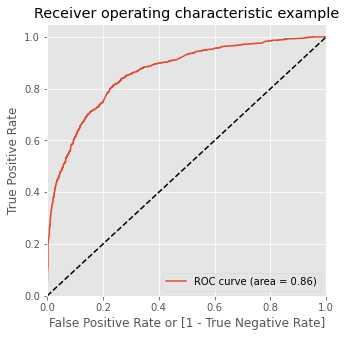

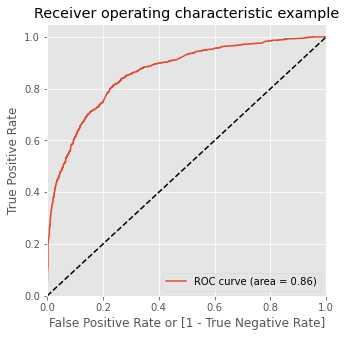

In [ ]:
# Call the ROC function

draw_roc(y_train_predictions_final.Converted, y_train_predictions_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. It is a good model. Let's check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [ ]:
#Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predictions_final[i]= y_train_predictions_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_predictions_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.304420          0    1    1    1    1    0    0    0   
1          0         0.083100          0    1    0    0    0    0    0    0   
2          1         0.070246          0    1    0    0    0    0    0    0   
3          1         0.225467          0    1    1    1    0    0    0    0   
4          1         0.976484          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.304420          0    1    1    1    1    0    0    0   
1          0         0.083100          0    1    0    0    0    0    0    0   
2          1         0.070246          0    1    0    0    0    0    0    0   
3          1         0.225467          0    1    1    1    0    0    0    0   
4          1         0.976484          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [ ]:
# Creating a dataframe to check the values of accuracy, sensitivity, and specificity at different values of probabiity 

cutoff_pro = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_predictions_final.Converted, y_train_predictions_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_pro.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_pro)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.562878  0.988832  0.166955
0.2   0.2  0.687066  0.947883  0.444637
0.3   0.3  0.765972  0.879479  0.660467
0.4   0.4  0.782112  0.823639  0.743512
0.5   0.5  0.778749  0.719404  0.833910
0.6   0.6  0.770007  0.646347  0.884948
0.7   0.7  0.744900  0.557003  0.919550
0.8   0.8  0.717776  0.459749  0.957612
0.9   0.9  0.663304  0.315496  0.986592
     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.562878  0.988832  0.166955
0.2   0.2  0.687066  0.947883  0.444637
0.3   0.3  0.765972  0.879479  0.660467
0.4   0.4  0.782112  0.823639  0.743512
0.5   0.5  0.778749  0.719404  0.833910
0.6   0.6  0.770007  0.646347  0.884948
0.7   0.7  0.744900  0.557003  0.919550
0.8   0.8  0.717776  0.459749  0.957612
0.9   0.9  0.663304  0.315496  0.986592


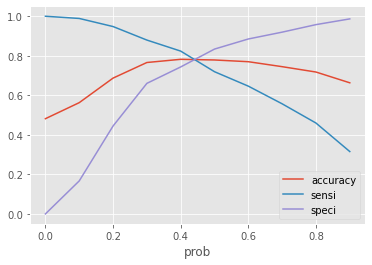

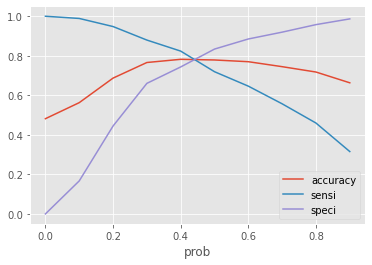

In [ ]:
# Let's plot this

cutoff_pro.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As per this we can get the optimal value around 0.42 for three metrics. hence, let's choose 0.42 as our cutoff now.

In [ ]:
y_train_predictions_final['final_predicted'] = y_train_predictions_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_predictions_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.304420          0    1    1    1    1    0    0    0   
1          0         0.083100          0    1    0    0    0    0    0    0   
2          1         0.070246          0    1    0    0    0    0    0    0   
3          1         0.225467          0    1    1    1    0    0    0    0   
4          1         0.976484          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.304420          0    1    1    1    1    0    0    0   
1          0         0.083100          0    1    0    0    0    0    0    0   
2          1         0.070246          0    1    0    0    0    0    0    0   
3          1         0.225467          0    1    1    1    0    0    0    0   
4          1         0.976484          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [ ]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_predictions_final.Converted, y_train_predictions_final.final_predicted)

0.7859224389150414

0.7859224389150414

In [ ]:
# Creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_predictions_final.Converted, y_train_predictions_final.final_predicted )
confusion2

array([[1757,  555],
       [ 400, 1749]], dtype=int64)

array([[1757,  555],
       [ 400, 1749]], dtype=int64)

In [ ]:
# Evaluating the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Calculating Sensitivity

TP/(TP+FN)

0.8138669148441136

0.8138669148441136

In [ ]:
# Calculating Specificity

TN/(TN+FP)

0.7599480968858131

0.7599480968858131

This cutoff point seems good to go!

# Making Predictions on the basis of the Test Set

Let's now make predicitons on the test set.

In [ ]:
# Scale the test set by 'transform'

X_test[['TotalVisits', 'Page_Views_Per_Visit', 'Total_Time_Spent_on_Website']] = scaler.transform(X_test[['TotalVisits', 'Page_Views_Per_Visit', 'Total_Time_Spent_on_Website']])

In [ ]:
# Select the columns in X_train for X_test as well

X_test = X_test[Var]
X_test.head()

Lead_Number  Total_Time_Spent_on_Website  \
4771       614107                     0.000000   
6122       602772                     0.029049   
9202       579885                     0.416813   
6570       599411                     0.378961   
2668       633996                     0.395246   

      Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
4771                                    0                          1   
6122                                    1                          0   
9202                                    1                          0   
6570                                    1                          0   
2668                                    1                          0   

      Lead_Source_Direct Traffic  Lead_Source_Reference  \
4771                           0                      1   
6122                           1                      0   
9202                           0                      0   
6570                           1                      0   
2668                           0                      0   

      A_free_copy_of_Mastering_The_Interview_Yes  \
4771                                           0   
6122                                           1   
9202                                           0   
6570                                           0   
2668                                           1   

      Last_Notable_Activity_Modified  Last_Notable_Activity_SMS Sent  \
4771                               0                               1   
6122                               0                               0   
9202                               0                               1   
6570                               0                               1   
2668                               1                               0   

      Last_Activity_Olark Chat Conversation  Last_Activity_SMS Sent  \
4771                                      0                       1   
6122                                      0                       0   
9202                                      0                       1   
6570                                      0                       1   
2668                                      0                       1   

      Do_Not_Email_Yes  Specialization_Select  \
4771                 0                      0   
6122                 0                      0   
9202                 0                      0   
6570                 1                      0   
2668                 0                      0   

      What_is_your_current_occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      What_is_your_current_occupation_Working Professional  
4771                                                  1     
6122                                                  0     
9202                                                  0     
6570                                                  0     
2668                                                  0

Lead_Number  Total_Time_Spent_on_Website  \
4771       614107                     0.000000   
6122       602772                     0.029049   
9202       579885                     0.416813   
6570       599411                     0.378961   
2668       633996                     0.395246   

      Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
4771                                    0                          1   
6122                                    1                          0   
9202                                    1                          0   
6570                                    1                          0   
2668                                    1                          0   

      Lead_Source_Direct Traffic  Lead_Source_Reference  \
4771                           0                      1   
6122                           1                      0   
9202                           0                      0   
6570                           1                      0   
2668                           0                      0   

      A_free_copy_of_Mastering_The_Interview_Yes  \
4771                                           0   
6122                                           1   
9202                                           0   
6570                                           0   
2668                                           1   

      Last_Notable_Activity_Modified  Last_Notable_Activity_SMS Sent  \
4771                               0                               1   
6122                               0                               0   
9202                               0                               1   
6570                               0                               1   
2668                               1                               0   

      Last_Activity_Olark Chat Conversation  Last_Activity_SMS Sent  \
4771                                      0                       1   
6122                                      0                       0   
9202                                      0                       1   
6570                                      0                       1   
2668                                      0                       1   

      Do_Not_Email_Yes  Specialization_Select  \
4771                 0                      0   
6122                 0                      0   
9202                 0                      0   
6570                 1                      0   
2668                 0                      0   

      What_is_your_current_occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      What_is_your_current_occupation_Working Professional  
4771                                                  1     
6122                                                  0     
9202                                                  0     
6570                                                  0     
2668                                                  0

In [ ]:
# Add a constant to X_test

X_test_constant= sm.add_constant(X_test[Var])

In [ ]:
# Check X_test_sm

X_test_constant

const  Lead_Number  Total_Time_Spent_on_Website  \
4771    1.0       614107                     0.000000   
6122    1.0       602772                     0.029049   
9202    1.0       579885                     0.416813   
6570    1.0       599411                     0.378961   
2668    1.0       633996                     0.395246   
...     ...          ...                          ...   
5828    1.0       605182                     0.027289   
6583    1.0       599310                     0.152289   
5531    1.0       607491                     0.702025   
3056    1.0       630654                     0.417694   
4088    1.0       620704                     0.530370   

      Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
4771                                    0                          1   
6122                                    1                          0   
9202                                    1                          0   
6570                                    1                          0   
2668                                    1                          0   
...                                   ...                        ...   
5828                                    1                          0   
6583                                    1                          0   
5531                                    1                          0   
3056                                    0                          0   
4088                                    1                          0   

      Lead_Source_Direct Traffic  Lead_Source_Reference  \
4771                           0                      1   
6122                           1                      0   
9202                           0                      0   
6570                           1                      0   
2668                           0                      0   
...                          ...                    ...   
5828                           1                      0   
6583                           0                      0   
5531                           1                      0   
3056                           0                      0   
4088                           0                      0   

      A_free_copy_of_Mastering_The_Interview_Yes  \
4771                                           0   
6122                                           1   
9202                                           0   
6570                                           0   
2668                                           1   
...                                          ...   
5828                                           0   
6583                                           0   
5531                                           1   
3056                                           0   
4088                                           0   

      Last_Notable_Activity_Modified  Last_Notable_Activity_SMS Sent  \
4771                               0                               1   
6122                               0                               0   
9202                               0                               1   
6570                               0                               1   
2668                               1                               0   
...                              ...                             ...   
5828                               1                               0   
6583                               0                               1   
5531                               0                               0   
3056                               0                               1   
4088                               0                               0   

      Last_Activity_Olark Chat Conversation  Last_Activity_SMS Sent  \
4771                                      0                       1   
6122                                      0                       0   
9202                                      0 

const  Lead_Number  Total_Time_Spent_on_Website  \
4771    1.0       614107                     0.000000   
6122    1.0       602772                     0.029049   
9202    1.0       579885                     0.416813   
6570    1.0       599411                     0.378961   
2668    1.0       633996                     0.395246   
...     ...          ...                          ...   
5828    1.0       605182                     0.027289   
6583    1.0       599310                     0.152289   
5531    1.0       607491                     0.702025   
3056    1.0       630654                     0.417694   
4088    1.0       620704                     0.530370   

      Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
4771                                    0                          1   
6122                                    1                          0   
9202                                    1                          0   
6570                                    1                          0   
2668                                    1                          0   
...                                   ...                        ...   
5828                                    1                          0   
6583                                    1                          0   
5531                                    1                          0   
3056                                    0                          0   
4088                                    1                          0   

      Lead_Source_Direct Traffic  Lead_Source_Reference  \
4771                           0                      1   
6122                           1                      0   
9202                           0                      0   
6570                           1                      0   
2668                           0                      0   
...                          ...                    ...   
5828                           1                      0   
6583                           0                      0   
5531                           1                      0   
3056                           0                      0   
4088                           0                      0   

      A_free_copy_of_Mastering_The_Interview_Yes  \
4771                                           0   
6122                                           1   
9202                                           0   
6570                                           0   
2668                                           1   
...                                          ...   
5828                                           0   
6583                                           0   
5531                                           1   
3056                                           0   
4088                                           0   

      Last_Notable_Activity_Modified  Last_Notable_Activity_SMS Sent  \
4771                               0                               1   
6122                               0                               0   
9202                               0                               1   
6570                               0                               1   
2668                               1                               0   
...                              ...                             ...   
5828                               1                               0   
6583                               0                               1   
5531                               0                               0   
3056                               0                               1   
4088                               0                               0   

      Last_Activity_Olark Chat Conversation  Last_Activity_SMS Sent  \
4771                                      0                       1   
6122                                      0                       0   
9202                                      0 

In [ ]:
# Drop the required columns from X_test

X_test.drop(['Lead_Source_Reference'], 1, inplace = True)

In [ ]:
# Making predictions on the test set and store the values in the variable 'pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [ ]:
y_test_pred[:10]

4771    1.0
6122    1.0
9202    1.0
6570    1.0
2668    1.0
4233    1.0
3368    1.0
9091    1.0
5972    1.0
3631    1.0
dtype: float64

4771    1.0
6122    1.0
9202    1.0
6570    1.0
2668    1.0
4233    1.0
3368    1.0
9091    1.0
5972    1.0
3631    1.0
dtype: float64

In [ ]:
# Converting y_pred to a dataframe

y_test_pred = pd.DataFrame(y_test_pred )

In [ ]:
# Let's see the head

y_test_pred.head()

0
4771  1.0
6122  1.0
9202  1.0
6570  1.0
2668  1.0

0
4771  1.0
6122  1.0
9202  1.0
6570  1.0
2668  1.0

In [ ]:
# Converting the y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [ ]:
# Remove index for both dataframes to append them side by side 

y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Append y_test_df and y_test_pred

y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

In [ ]:
# Check 'y_pred_final'

y_pred_final.head()

Converted    0
0          1  1.0
1          0  1.0
2          0  1.0
3          1  1.0
4          1  1.0

Converted    0
0          1  1.0
1          0  1.0
2          0  1.0
3          1  1.0
4          1  1.0

In [ ]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [ ]:
y_pred_final.head()

Converted  Conversion_Prob
0          1              1.0
1          0              1.0
2          0              1.0
3          1              1.0
4          1              1.0

Converted  Conversion_Prob
0          1              1.0
1          0              1.0
2          0              1.0
3          1              1.0
4          1              1.0

In [ ]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [ ]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1              1.0                1
1          0              1.0                1
2          0              1.0                1
3          1              1.0                1
4          1              1.0                1

Converted  Conversion_Prob  final_predicted
0          1              1.0                1
1          0              1.0                1
2          0              1.0                1
3          1              1.0                1
4          1              1.0                1

In [ ]:
# Let's c                                                                               
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.4790794979079498

0.4790794979079498

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[  0, 996],
       [  0, 916]], dtype=int64)

array([[  0, 996],
       [  0, 916]], dtype=int64)

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Calculate sensitivity
TP / float(TP+FN)

1.0

1.0

In [ ]:
# Calculate specificity
TN / float(TN+FP)

0.0

0.0

# Precision-Recall View

Let's now also build the training model using the precision-recall view

In [ ]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_predictions_final.Converted, y_train_predictions_final.Predicted )
confusion

array([[1928,  384],
       [ 603, 1546]], dtype=int64)

array([[1928,  384],
       [ 603, 1546]], dtype=int64)

Precision (TP / TP + FP)

In [ ]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8010362694300518

0.8010362694300518

Recall (TP / TP + FN)

In [ ]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7194043741275011

0.7194043741275011

Precision and recall tradeoff

In [ ]:
y_train_predictions_final.Converted, y_train_predictions_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_predictions_final.Converted, y_train_predictions_final.Conversion_Prob)

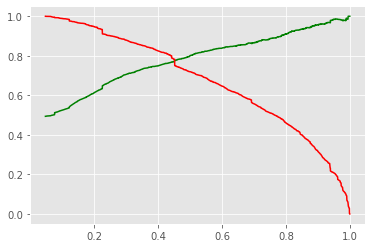

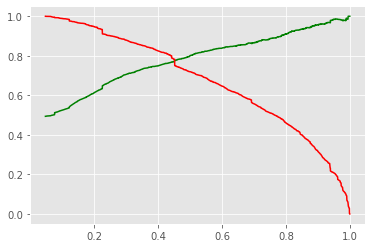

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
y_train_predictions_final['final_predicted'] = y_train_predictions_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_predictions_final.head()


Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.304420          0    1    1    1    1    0    0    0   
1          0         0.083100          0    1    0    0    0    0    0    0   
2          1         0.070246          0    1    0    0    0    0    0    0   
3          1         0.225467          0    1    1    1    0    0    0    0   
4          1         0.976484          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.304420          0    1    1    1    1    0    0    0   
1          0         0.083100          0    1    0    0    0    0    0    0   
2          1         0.070246          0    1    0    0    0    0    0    0   
3          1         0.225467          0    1    1    1    0    0    0    0   
4          1         0.976484          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [ ]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_predictions_final.Converted, y_train_predictions_final.final_predicted)

0.7865949338713293

0.7865949338713293

In [ ]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_predictions_final.Converted, y_train_predictions_final.final_predicted )
confusion2

array([[1788,  524],
       [ 428, 1721]], dtype=int64)

array([[1788,  524],
       [ 428, 1721]], dtype=int64)

In [ ]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Calculate Precision

TP/(TP+FP)

0.7665924276169265

0.7665924276169265

In [ ]:
# Calculate Recall

TP/(TP+FN)

0.8008375988832015

0.8008375988832015

The institute is geeting lots of leads however, they need to review it more carefully and according to the education qualification , job . In order to get a higher success rate we need to categories the leads 'TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit'  by which we can understand that who all are interseted and willing to by the course. 

By this we can contact the customer and as per the session and the time they spend on website we can offer them.